In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 11)}, font_scale=2)

from tqdm import tqdm

import sys
sys.path.append('../../')

import utils
import semantic_type_propagation as stp

# Improve Existing Homograph Groundtruth

In [2]:
df_path = '../../output/TUS/'
g_path = '../../../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_with_groundtruth_df.pickle')
G = pickle.load(open(g_path, "rb"))

In [4]:
# Create the 'graph_stats_with_groundtruth_updated_homographs_df.pickle'
# Uncomment this cell if the dataframe has not been produced

# # Improve the derived homograph groundtruth by identifying values with more than one meaning by considering the column names where they are found
# vals_with_more_than_1_meaning = set()
# all_col_names = set()
# for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
#     col_names =  utils.graph_helpers.get_cell_node_column_names(G, row['node'])
#     num_meanings = len(col_names)
#     all_col_names |= set(col_names)
#     if num_meanings > 1:
#         vals_with_more_than_1_meaning.add(row['node'])
# print('Nodes with more than 1 meaning:', len(vals_with_more_than_1_meaning))
# print('Number of unique column names', len(all_col_names))

# # Update the 'is_homograph' column, to be true for only nodes found in 'vals_with_more_than_1_meaning'
# df['is_homograph'] = False
# df.loc[df['node'].isin(vals_with_more_than_1_meaning), 'is_homograph'] = True

# # Save updated dataframe
# df.to_pickle(df_path+'graph_stats_with_groundtruth_updated_homographs_df.pickle')

100%|██████████| 200258/200258 [00:17<00:00, 11309.06it/s]


Nodes with more than 1 meaning: 11150
Number of unique column names 114


In [3]:
df = pd.read_pickle(df_path+'graph_stats_with_groundtruth_updated_homographs_df.pickle')

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df.sort_values(by='betweenness_centrality', ascending=False).head(30)

  1%|          | 100/11150 [00:00<00:11, 991.50it/s]

There are 185941 cell nodes with a degree greater than 1
There are 2994 unique ranks based on BC.


100%|██████████| 11150/11150 [00:04<00:00, 2358.74it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2
70313,.,cell,0.023005,0.000278,True,False,3.0,3
10223,50,cell,0.022695,0.000293,True,False,4.0,8
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2
167467,Conseil de d�veloppement du loisir scientifique,cell,0.019039,0.000248,True,False,6.0,2
37189,125,cell,0.018832,0.000235,True,False,7.0,4
17681,2,cell,0.018183,0.000220,True,False,8.0,8
154414,Biomedical Engineering,cell,0.017811,0.000219,True,False,9.0,2
178282,SQA,cell,0.012905,0.000159,True,False,10.0,2


In [29]:
df['num_meanings_groundtruth'].value_counts()

1     174791
2       9791
3       1059
4        231
5         43
6         12
7          8
8          5
20         1
Name: num_meanings_groundtruth, dtype: int64

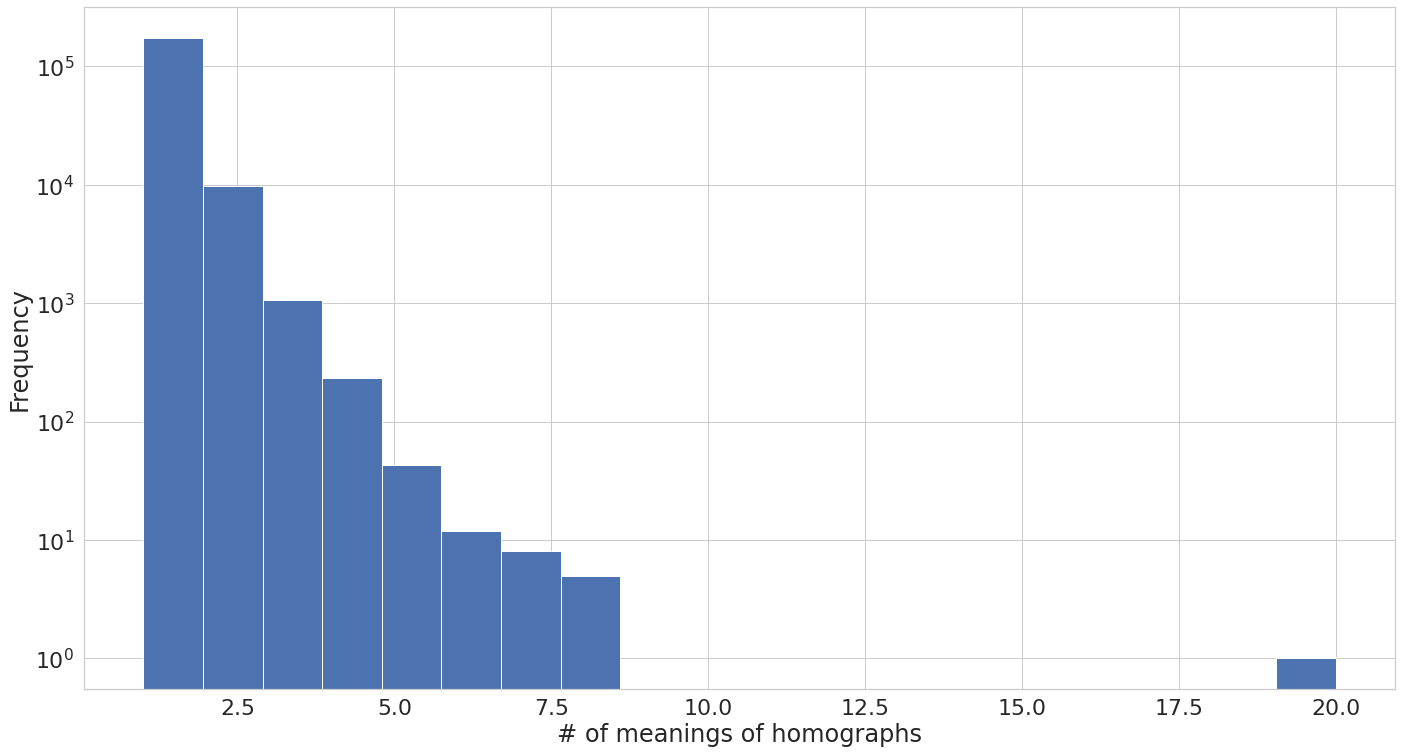

In [32]:
plt.hist(df['num_meanings_groundtruth'], log=True, bins=20)
plt.xlabel('# of meanings of homographs');plt.ylabel('Frequency');plt.tight_layout()
plt.savefig('../../figures/num_meanings/TUS/num_meanings_histogram.svg')

# Evaluation (Top-300)

In [4]:
# Get a list with the top 300 nodes
json.dumps(df['node'][:300].tolist(), ensure_ascii=False)

'["Music Faculty", "Manitoba Hydro", ".", "50", "1800ZZMALDY2", "Conseil de d�veloppement du loisir scientifique", "125", "2", "Biomedical Engineering", "SQA", "Fraser Valley", " ", "647", "PUB", "Astronomy and Astrophysics", "Unknown", "Cardiff University", "Communitech", "Ocean Networks Canada", "Human Frontier Science Program", "3", "None", "Combinatorics and Optimization", "Togo", "Mechanical and Mechatronics Engineering", "ABI", "Common", "761", "BRIDGE STREET", "Newport", "Cardiff", "Bridge", "109", "GreenCentre Canada", "ASM Materials Camp Canada", "A", "Park & Ride", "OAKLANDS ROAD", "Park Road", "Broad Street", "Newtown", "MINERA", "672", "100", "PARK AND RIDE", "Buckley", "CIS", "Information not available", "Corporation Road", "Carmarthen", "Nelson", "SCH", "Station Road", "RFD", "Psychologie", "Georgia", "University of Western Ontario", "University of Victoria", "Broadway", "Alexandra Road", "nr", "Swimming Pool", "HEC Montr�al", "Waterloo", "Montserrat", "Farm", "MTQ", "100

In [14]:
output_dir_incomplete = '../../output/TUS/num_of_meanings_incomplete_coverage/'
output_dir_complete = '../../output/TUS/num_of_meanings_complete_coverage/'

## Incomplete Coverage

In [15]:
with open(output_dir_incomplete + 'output.json') as json_file:
    out_dict_incomplete = json.load(json_file)

df_incomplete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_incomplete, G)
df_incomplete.to_pickle(output_dir_incomplete+'df_processed.pickle')

df_incomplete[df_incomplete['node'].isin(out_dict_incomplete['marked_homographs'].keys())]

100%|██████████| 300/300 [03:03<00:00,  1.64it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3,2.0,3246.0,0.614295,2.0,57.0,25.390635,False,False
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2,2.0,3236.0,1.000000,2.0,121.0,22.199320,True,True
70313,.,cell,0.023005,0.000278,True,False,3.0,3,3.0,919.0,1.000000,3.0,62.0,21.978237,True,True
10223,50,cell,0.022695,0.000293,True,False,4.0,8,4.0,4887.0,0.986904,3.0,73.0,4.994066,False,False
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2,2.0,5907.0,0.829524,2.0,32.0,18.920433,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135426,Networks of Centres of Excellence - Letters of...,cell,0.000259,0.000004,True,False,232.0,2,5.0,11.0,1.000000,5.0,196.0,24.636364,False,False
82411,METROLINK STOP,cell,0.000256,0.000003,True,False,233.0,2,3.0,5918.0,0.735215,3.0,104.0,22.496789,False,False
35501,Harold Ave,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False
34884,Enfield Rd,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False


## Complete Coverage

In [17]:
with open(output_dir_complete + 'output.json') as json_file:
    out_dict_complete = json.load(json_file)

df_complete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_complete, G)
df_complete.to_pickle(output_dir_complete+'df_processed.pickle')

df_complete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]

100%|██████████| 300/300 [03:04<00:00,  1.63it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3,2.0,3246.0,0.614295,2.0,57.0,25.390635,False,False
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2,2.0,3236.0,1.000000,2.0,121.0,22.199320,True,True
70313,.,cell,0.023005,0.000278,True,False,3.0,3,3.0,919.0,1.000000,3.0,62.0,21.978237,True,True
10223,50,cell,0.022695,0.000293,True,False,4.0,8,4.0,4888.0,0.986702,3.0,73.0,4.994272,False,False
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2,2.0,5907.0,0.829524,2.0,32.0,18.920433,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135426,Networks of Centres of Excellence - Letters of...,cell,0.000259,0.000004,True,False,232.0,2,5.0,14.0,1.000000,5.0,196.0,29.785714,False,False
82411,METROLINK STOP,cell,0.000256,0.000003,True,False,233.0,2,3.0,5918.0,0.735215,3.0,104.0,22.496789,False,False
35501,Harold Ave,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False
34884,Enfield Rd,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False


In [42]:
# Precision using propagation and connected components:
df_incomplete_300 = df_incomplete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]
df_complete_300 = df_complete[df_complete['node'].isin(out_dict_complete['marked_homographs'].keys())]

print('Incomplete coverage with propagation precision:', df_incomplete_300['is_num_meanings_correct'].value_counts()[True] / len(df_incomplete_300.index))
print('Complete coverage with propagation precision:', df_complete_300['is_num_meanings_correct'].value_counts()[True] / len(df_complete_300.index))

print('Incomplete coverage with connected components precision:', df_incomplete_300['is_num_components_correct'].value_counts()[True] / len(df_incomplete_300.index))
print('Complete coverage with connected components precision:', df_complete_300['is_num_components_correct'].value_counts()[True] / len(df_complete_300.index))


Incomplete coverage with propagation precision: 0.29
Complete coverage with propagation precision: 0.25666666666666665
Incomplete coverage with connected components precision: 0.18666666666666668
Complete coverage with connected components precision: 0.18


In [52]:
# Identify how many truly unambiguous values were identified to have only 1 meaning
df_incomplete_300_uv = df_incomplete_300[df_incomplete_300['is_homograph'] == False]
df_complete_300_uv = df_complete_300[df_complete_300['is_homograph'] == False]

print('UV Incomplete coverage with propagation correct:', df_incomplete_300_uv['is_num_meanings_correct'].value_counts()[True])
print('UV Complete coverage with propagation correct:', df_complete_300_uv['is_num_meanings_correct'].value_counts())

print('UV Incomplete coverage with connected components correct:', df_incomplete_300_uv['is_num_components_correct'].value_counts()[True])
print('UV Complete coverage with connected components correct:', df_complete_300_uv['is_num_components_correct'].value_counts())

UV Incomplete coverage with propagation correct: 2
UV Complete coverage with propagation correct: False    46
Name: is_num_meanings_correct, dtype: int64
UV Incomplete coverage with connected components correct: 2
UV Complete coverage with connected components correct: False    46
Name: is_num_components_correct, dtype: int64


# Test

In [55]:
df[df['is_homograph'] == False].head(50)

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
154194,No summary - Aucun sommaire,cell,0.001103,0.000015,False,False,75.0,NaN
164402,UFA Nomination,cell,0.000982,0.000012,False,False,83.0,NaN
166782,Yeendoo nanh nakhweenjit k' art' ahanahtyaa - ...,cell,0.000982,0.000012,False,False,83.0,NaN
163961,No title - Aucun titre,cell,0.000982,0.000012,False,False,83.0,NaN
164831,Arctic freshwater systems: hydrology and ecology,cell,0.000982,0.000012,False,False,83.0,NaN
166510,Student - Research,cell,0.000982,0.000012,False,False,83.0,NaN
166799,Technologies and Strategies for Assessment of ...,cell,0.000982,0.000012,False,False,83.0,NaN
168730,Canada Research Chair in Cognitive Neuroscience,cell,0.000690,0.000008,False,False,110.0,NaN
169576,Preclinical development of payload and vehicle...,cell,0.000690,0.000008,False,False,110.0,NaN
169931,"Modeling, fabrication and characterization of ...",cell,0.000690,0.000008,False,False,110.0,NaN


In [68]:
utils.graph_helpers.get_cell_node_column_names(G, 'Music Faculty')

['CommonName', 'Landmark', 'Department-D�partement']

In [67]:
utils.graph_helpers.get_cell_node_column_names(G, ' ')

['CONSIS_PLS',
 'ROOT_THICK',
 'CONSIS_DRY',
 'S_PRM_KIND',
 'MOTTLE_SZE',
 'S_PRM_MOD',
 'COLOUR_1',
 'SALINITY',
 'S_SEC_GRAD',
 'CONSIS_MST',
 'S_PRM_SIZE',
 'ROOT_ORIEN',
 'S_SEC_KIND',
 'S_SEC_SIZE',
 'S_PRM_GRAD',
 'CONSIS_WET',
 'ROOT_FREQ',
 'MOTTLE_FRQ',
 'EFFERVESC',
 'COLOUR_2']